# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from sklearn import cluster

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
from sklearn.metrics import silhouette_score

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans=KMeans(n_clusters=8)
clusters=kmeans.fit(X)
y_pred = kmeans.predict(X)
silhouette_score(X, y_pred)

0.5406824747857625

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [7]:
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit(X)
y_pred2 = kmeans.predict(X)
silhouette_score(X, y_pred2)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [8]:
kmeans=KMeans(n_clusters=3)
clusters=kmeans.fit(X)
y_pred3 = kmeans.predict(X)
silhouette_score(X, y_pred3)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [9]:
#!pip install yellowbrick

In [10]:
import yellowbrick

In [11]:
from yellowbrick.features import JointPlotVisualizer

In [29]:
from sklearn.cluster import KMeans

In [30]:
from yellowbrick.cluster import KElbowVisualizer

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


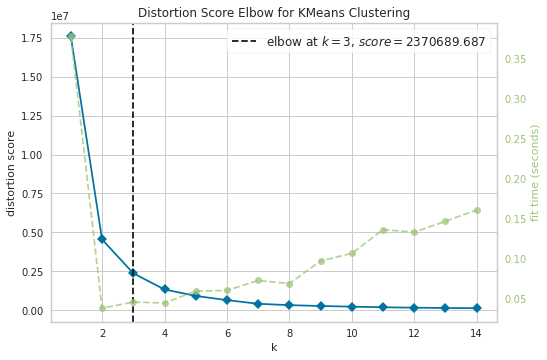

In [31]:
model=cluster.KMeans()

visual=KElbowVisualizer(model, k=(1, 15))
visual.fit(X)

visual.poof();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [32]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y_pred3=single.labels_

silhouette_score(X, y_pred3) 

0.5393938960075034

In [33]:
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [34]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [35]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

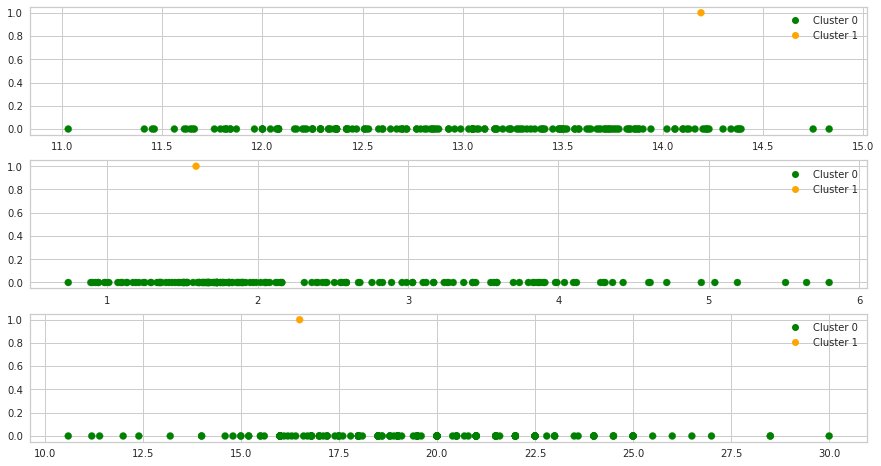

In [36]:
fig,ax = plt.subplots(3, 1, figsize=(15, 8))

colors=np.array(['green', 'orange'])

legend_e=[Line2D([0],[0], color=c, marker='o', linestyle='',
                 label='Cluster {}'.format(i))  for i,c in enumerate(colors)]

ax[0].scatter(X['alcohol'], y_pred3, color=colors[y_pred3])
ax[0].legend(handles=legend_e, loc='upper right')

ax[1].scatter(X['malic_acid'], y_pred3, color=colors[y_pred3])
ax[1].legend(handles=legend_e, loc='upper right');

ax[2].scatter(X['alcalinity_of_ash'], y_pred3, color=colors[y_pred3])
ax[2].legend(handles=legend_e, loc='upper right');

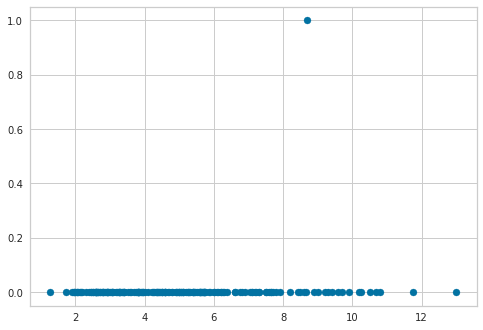

In [37]:
model=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
model.fit(X)

y_pred3=model.labels_

plt.scatter(X['color_intensity'], y_pred3);

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA()

pca.fit(X)

print(X.shape)

pca.explained_variance_ratio_

(178, 13)


array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

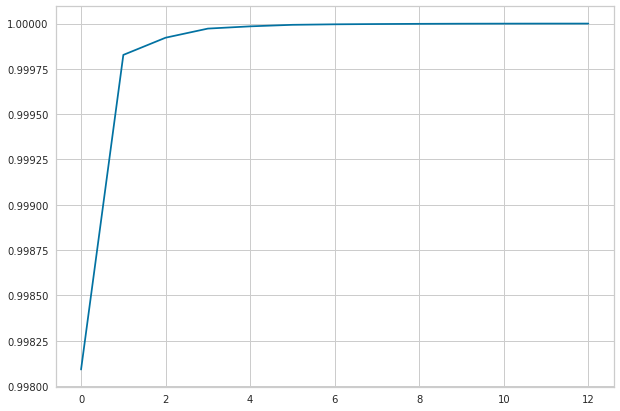

In [40]:
plt.figure(figsize=(10, 7))

plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [41]:
pca = PCA(n_components=2).fit_transform(X)

pca_df = pd.DataFrame(pca, columns=[f'pc_{i+1}' for i in range(2)])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


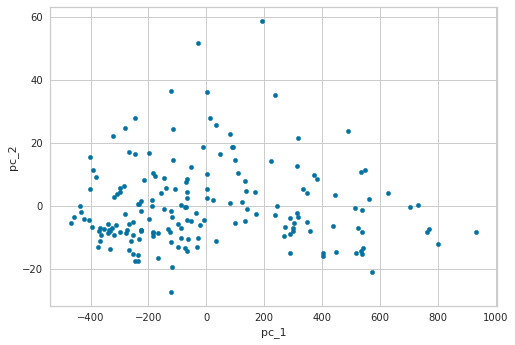

In [42]:
pca_df.plot.scatter(x='pc_1', y='pc_2');

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [43]:
from sklearn.manifold import TSNE

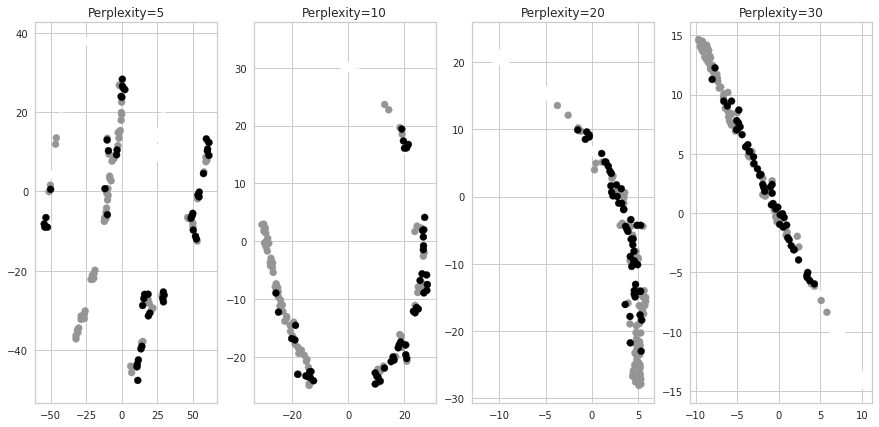

In [46]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 10, 20, 30]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();